In [26]:
import wfdb
import pandas as pd
import numpy as np
from scipy import signal, fftpack, io
import pywt
from matplotlib import pyplot as plt
from IPython.display import set_matplotlib_formats as set_fmt
import warnings

# Set SVG output format for better plot quality
set_fmt('svg')
warnings.filterwarnings("ignore", category=DeprecationWarning)

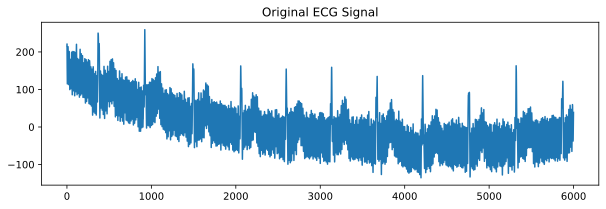

In [27]:
# Load the ECG signals
filename = 'sampleECG3.mat'
ds = io.loadmat(filename)
sig = ds['signal'].ravel()  # Flatten the signal to 1D
fs = 720  # Sampling frequency

# Plot the raw ECG signal
plt.figure(figsize=(10, 3))
plt.plot(sig)
plt.title('Original ECG Signal')
plt.show()

In [28]:
# Preprocess with Butterworth high-pass filter (to remove baseline drift)
b, a = signal.butter(3, 0.5 / (fs / 2), 'high')  # 0.5 Hz cutoff frequency
sig = signal.filtfilt(b, a, sig)


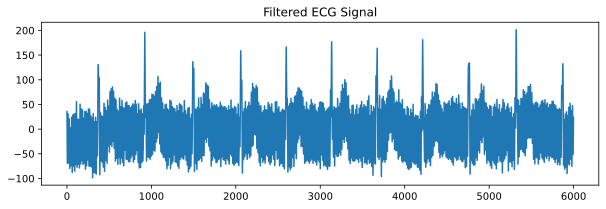

In [29]:
# Plot the filtered signal
plt.figure(figsize=(10, 3))
plt.plot(sig)
plt.title('Filtered ECG Signal')
plt.show()

# Wavelet Transform Decomposition and Reconstruction

In [30]:
 coeffs= pywt.wavedec(sig,wavelet='db6',level=4,mode='symmetric',axis=0)

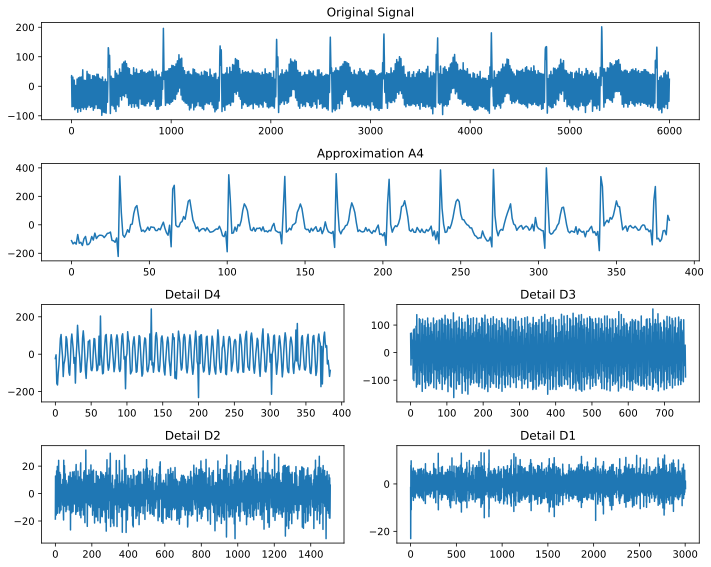

In [31]:
# Wavelet Coefficient Visualization

plt.figure(figsize=(10, 8))

# Plot the original signal in the first row, spanning two columns
plt.subplot(4, 2, (1, 2))
plt.plot(sig)
plt.title('Original Signal')

# Plot the approximation signal across the full width of the second row
plt.subplot(4, 2, (3, 4))
plt.plot(coeffs[0])
plt.title('Approximation A4')

# Plot each detail coefficient in the following rows, one per cell
for i in range(1, len(coeffs)):
    plt.subplot(4, 2, 4 + i)  # Adjusted index to start in the third row
    plt.plot(coeffs[i])
    plt.title(f'Detail D{5 - i}')  # Adjust title according to wavelet level

plt.tight_layout()
plt.show()

# Denoising with Thresholding

In [32]:
coeffs_new=[coeffs[0]]
for i in range(1,len(coeffs)):
     c= coeffs[i]
     M= np.abs(c)
     mad= np.median(M)/0.6745
     thr= 5*mad  
     c_den= pywt.threshold(c,thr,mode='soft')
     coeffs_new.append(c_den)

In [33]:
# Signal Reconstruction with Thresholded Coefficients
sig_new = pywt.waverec(coeffs=coeffs_new,wavelet='db6',mode='symmetric')

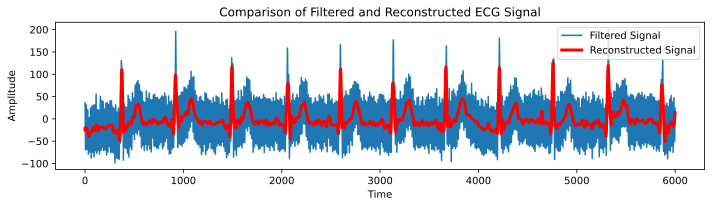

In [34]:
# Plot original and reconstructed signals
plt.figure(figsize=(10, 3))

plt.plot(sig, label='Filtered Signal')
plt.plot(sig_new, 'r', linewidth=3, label='Reconstructed Signal')
plt.title('Comparison of Filtered and Reconstructed ECG Signal')
plt.xlabel('Time')
plt.ylabel('Amplitude')
plt.legend()

plt.tight_layout()
plt.show()